<a href="https://colab.research.google.com/github/pauloEzequiel/Sentiment_Analysis/blob/main/Notebook/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treinando o modelo de classificação com machine learning
> O objetivo desse projeto é a construção de um interpretador de sentimentos usando tecnicas de PLN. O PLN carrega uma série de desafios em função da linguagem humana. Dessa forma, a proposta desse matérial é utilizar um dataset copilado a partir de um scraping usando a biblioteca 'Google-Play-Scraper', foram coletados dados de avaliações de usuários das seguintes urls:
> 1. br.com.brainweb.ifood
> 2. com.cerveceriamodelo.modelonow
> 3. com.mcdo.mcdonalds
> 4. habibs.alphacode.com.br
> 5. com.xiaojukeji.didi.brazil.customer
> 6. com.ubercab.eats
> 7. com.grability.rappi
> 8. burgerking.com.br.appandroid

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Importando dataset construindo a partir de scrapping
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/pauloEzequiel/Sentiment_Analysis/main/Notebook/dataset/Dataset_Sentiment_Analysis.csv')
df.head()


,content,score
0,O aplicativo é bom referente ao restaurante ma...,1
1,"Não comprem cupons de desconto, pois nunca mai...",1
2,"Não consigo fazer compras pelo app no mercado,...",1
3,"O app é bom, mas tem bugs referentes a cupons ...",1
4,"Ultimamente, o atendimento está muito ruim. O ...",1


In [7]:
# Estou definindo um sentimento de acordo a nota data pelo seu usuario, nota esta que varia entre 0 a 5
# 0 - Negativa
# 1 - Neutro
# 2 - Positivo

def to_sentiment(rating):
  rating = int(rating)
  if rating <= 3:
    return 0
  elif rating == 4:
    return 1
  else:
    return 2

df['sentiment'] = df.score.apply(to_sentiment)
df.head()

,content,score,sentiment
0,O aplicativo é bom referente ao restaurante ma...,1,0
1,"Não comprem cupons de desconto, pois nunca mai...",1,0
2,"Não consigo fazer compras pelo app no mercado,...",1,0
3,"O app é bom, mas tem bugs referentes a cupons ...",1,0
4,"Ultimamente, o atendimento está muito ruim. O ...",1,0


In [8]:
# Etapa de preparação do texto

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,KFold

# Extraímos as features usando a frequência das palavras
vetorizador = CountVectorizer(binary = True)
X = vetorizador.fit_transform(df['content'])
y = df.sentiment

# Separação em bases de treino e teste (holdout)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Definindo a métrica de avaliação dos algoritmos
scoring = 'accuracy'

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds


NB: 0.728906 (0.018477)
LR: 0.754948 (0.014094)
KNN: 0.672135 (0.018218)
CART: 0.699349 (0.009576)
SVM: 0.755859 (0.011533)


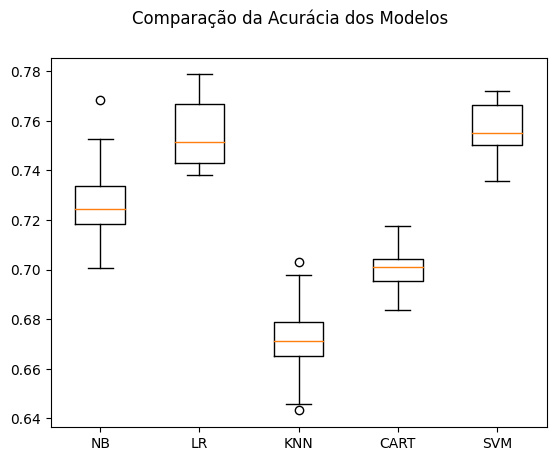

In [9]:
# Etapa de Validação de modelos

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.linear_model import LogisticRegression # algoritmo Regressão Logística
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM

# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('NB', MultinomialNB()))
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez

for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [15]:
# Classificando Sentimento
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

vetorizador = CountVectorizer(binary = True)
X = vetorizador.fit_transform(df['content'])

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

validacao = ["Existem muitas formas de se aprender, basta querer.",
          "Há dias que o trabalho é uma verdadeira calamidade",
          "Hoje não estou muito bem",
          "Depois do culto você vai ver",
          "Vestidos de heróis dos pés a cabeça para levar um pouco de conhecimento para a humanidade",
          "A Net é muito boa, tem um excelente serviço de telefonia, sucesso de vendas",
          "excelente ação!"
          "O estado de Minas Gerais decretou calamidade financeira!!!",
          "que merda esse app"
         ]


predictions_vetor = vetorizador.transform(validacao)

model.predict(predictions_vetor)







0.771875


array([0, 0, 0, 0, 1, 2, 2, 0])

# Construindo intepretador de sentimento usando Redes Neurais
---

> O desempenho do modelo de classificação construído com aprendizado de máquina deixou a desejar. Apesar dos valores de accuracy_score, acredito que o conjunto de dados empregado pode não conter exemplos representativos que permitam ao modelo treinado comportar-se de maneira satisfatória. Além disso, a abordagem de inferir sentimentos com base na frequência de palavras ainda me parece frágil, considerando esses fatores como possíveis causas para a baixa assertividade do modelo. Diante disso, objetivando melhores desempenho, optei por construir um modelo utilizando rede neural utilizando um modelo de representação de linguagem BERT (Bidirectional Encoder Representations from Transformers). As representações de linguagem profundas e bidirecionais aprendidas por BERT ajudam o modelo a entender contextos complexos e nuances na linguagem, tornando-o eficaz na analise de sentimento e aplicações afins. Diferentemete da frequencia de palavras que necessita de muito mais ajustes para que se obtenha resultados satisfatório.

> Esse rede neural foi construida baseado no trabalho de Hugo Zanini disponivel em [Analise de Sentimento](https://github.com/hugozanini/sentiment-analysis.git)







In [16]:
#Determinando classes

class_names = ['negative', 'neutral', 'positive']
df.head()

,content,score,sentiment
0,O aplicativo é bom referente ao restaurante ma...,1,0
1,"Não comprem cupons de desconto, pois nunca mai...",1,0
2,"Não consigo fazer compras pelo app no mercado,...",1,0
3,"O app é bom, mas tem bugs referentes a cupons ...",1,0
4,"Ultimamente, o atendimento está muito ruim. O ...",1,0


In [ ]:
# Instalando o pacote transformer
# De forma simplista, esse pacote permite a rede neural aprender relações contextuais entre palavras
!pip install -qq transformers

import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

In [ ]:
PRE_TRAINED_MODEL_NAME = 'neuralmind/bert-base-portuguese-cased'

tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

token_lens = []

for txt in df.content:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
MAX_LEN = 160
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

class GPReviewDataset(Dataset):

  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.reviews)

  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      #padding='longest',
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.1, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

df_train.shape, df_val.shape, df_test.shape

((8640, 3), (480, 3), (480, 3))

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    reviews=df.content.to_numpy(),
    targets=df.sentiment.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

In [ ]:
BATCH_SIZE = 16

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)


len(train_data_loader)

540

In [ ]:
data = next(iter(train_data_loader))
data.keys()

print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([16, 160])
torch.Size([16, 160])
torch.Size([16])


In [ ]:
from torch import nn

class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME, return_dict=False)
    self.drop = nn.Dropout(p=0.3)
    #The last_hidden_state is a sequence of hidden states of the last layer of the model
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    output = self.drop(pooled_output)
    return self.out(output)


model = SentimentClassifier(len(class_names))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [ ]:
EPOCHS = 10

optimizer = AdamW(model.parameters(), lr=3e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [ ]:
def train_epoch(
  model,
  data_loader,
  loss_fn,
  optimizer,
  device,
  scheduler,
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0

  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
# Treinamento
%%time

from collections import defaultdict

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn,
    device,
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'Sentiment_Analitic_model.bin')
    best_accuracy = val_acc

Epoch 1/10
----------
Train loss 0.6243747859089462 accuracy 0.7591435185185186
Val   loss 0.511851979792118 accuracy 0.8125

Epoch 2/10
----------
Train loss 0.4467730125619305 accuracy 0.834837962962963
Val   loss 0.5204123678306739 accuracy 0.8270833333333333

Epoch 3/10
----------
Train loss 0.3091934358287189 accuracy 0.8971064814814815
Val   loss 0.7251618891954422 accuracy 0.7979166666666666

Epoch 4/10
----------
Train loss 0.2285600964643958 accuracy 0.9273148148148148
Val   loss 0.8660305028160413 accuracy 0.7916666666666666

Epoch 5/10
----------
Train loss 0.16218156418892452 accuracy 0.9519675925925927
Val   loss 0.9781734406948089 accuracy 0.7979166666666666

Epoch 6/10
----------
Train loss 0.1279559777918082 accuracy 0.960300925925926
Val   loss 1.055787988503774 accuracy 0.8041666666666667

Epoch 7/10
----------
Train loss 0.10168474898608919 accuracy 0.9668981481481482
Val   loss 1.1245528067151704 accuracy 0.80625

Epoch 8/10
----------
Train loss 0.08673546427852233

In [ ]:
tests = ["Eu gostaria de fazer uma avaliação sincera aqui e ver se o modelo vai identificar. Mas esse é só um teste, \
          então nao consigo dizer se gosto ou nao gosto. Pode ser bom ou pode ser ruim :):(:",
         "Esse aplicativo é muito louco, bem complicado de mexer",
         "vamos vê no que vai dá",
         "deu bom!",
         "Odeio ICaju-Shop",
         "Não consigo fazer compras pelo app",
         "Há dias que o trabalho é uma verdadeira calamidade",
         "Deu ruim",
         "Na moral, tá pra nascer app melhor que o Zé delivery!. Bebida sempre gelada e em minutos."
         ]

In [ ]:
import torch.nn.functional as F
import torch

for test in tests:
  encoded_review = tokenizer.encode_plus(
    test,
    max_length=MAX_LEN,
    add_special_tokens=True,
    return_token_type_ids=False,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_tensors='pt',
  )

  input_ids = encoded_review['input_ids'].to(device)
  attention_mask = encoded_review['attention_mask'].to(device)

  output = model(input_ids, attention_mask)
  _, prediction = torch.max(output, dim=1)
  probs = F.softmax(output, dim=1)

  print(f'Review text: {test}')
  print(pd.DataFrame(probs.tolist()[0], class_names)[0])
  print("========================\n")

Review text: Eu gostaria de fazer uma avaliação sincera aqui e ver se o modelo vai identificar. Mas esse é só um teste,           então nao consigo dizer se gosto ou nao gosto. Pode ser bom ou pode ser ruim :):(:
negative    0.000454
neutral     0.999364
positive    0.000182
Name: 0, dtype: float64

Review text: Esse aplicativo é muito louco, bem complicado de mexer
negative    0.999633
neutral     0.000128
positive    0.000238
Name: 0, dtype: float64

Review text: vamos vê no que vai dá
negative    0.257832
neutral     0.001880
positive    0.740287
Name: 0, dtype: float64

Review text: deu bom!
negative    0.111851
neutral     0.765945
positive    0.122204
Name: 0, dtype: float64

Review text: Odeio ICaju-Shop
negative    0.998302
neutral     0.000097
positive    0.001601
Name: 0, dtype: float64

Review text: Não consigo fazer compras pelo app
negative    0.999563
neutral     0.000101
positive    0.000336
Name: 0, dtype: float64

Review text: Há dias que o trabalho é uma verdadeira ca